# Análisis de estudiantes de la UC
###### Alberto Benavides

Primero se leen los datos y se muestran algunos datos en general.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('datos.csv')
df

,Sexo,Edad,Municipio,Trabaja,ProgramaEducativo
0,M,36,ABASOLO,NO,Licenciatura En Derecho
1,M,17,ABASOLO,NO,Bachillerato
2,M,53,ABASOLO,NO,Bachillerato
3,M,22,AGUA LEGUAS,NO,Licenciatura en Administración con Acentuación...
4,M,29,ALLENDE,NO,Maestria En Educación con acentuación en Tecno...
...,...,...,...,...,...
3199,M,20,Monterrey,NO,Bachillerato
3200,M,21,Monterrey,NO,Bachillerato
3201,M,21,Monterrey,NO,Bachillerato
3202,M,26,Monterrey,NO,Bachillerato


Se analizan ahora las edades, porque a simple vista parece haber algunas fuera de rango. Un diagrama de cajas y bigotes da una buena idea de esto.

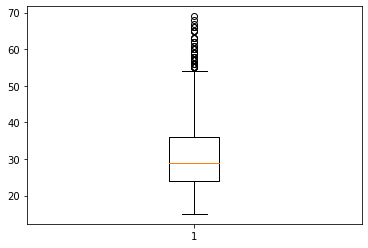

In [33]:
plt.boxplot(df.Edad)
plt.show()

Hay edades muy grandes. De 2020, que posiblemente haya sido mala captura o confusión en la captura. Se eliminarán edades de más de 200 años.

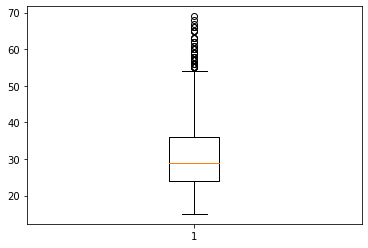

In [34]:
df_copia = df[df.Edad < 200]
plt.boxplot(df_copia.Edad)
plt.show()

Ahora se ven algunas negativas, que dan la idea también de errores en captura. Se eliminan registros con edades negativas.

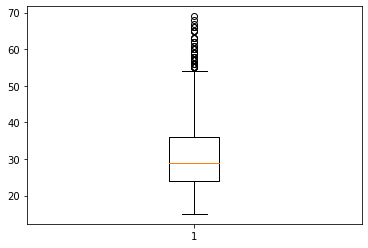

In [35]:
df_copia = df_copia[df_copia.Edad > 0]
plt.boxplot(df_copia.Edad)
plt.show()

Se eliminan ahora todos los registros con campos vacíos.

In [36]:
len(df_copia)

3204

In [37]:
df_na = df_copia.dropna()
len(df_na)

3204

Ahora se procede a revisar el resto de las columnas.

In [38]:
df_na.Sexo.unique()

array(['M', 'H'], dtype=object)

In [39]:
list(df_na.sort_values('Municipio').Municipio.unique())

['ABASOLO',
 'AGUA LEGUAS',
 'ALLENDE',
 'APODACA',
 'ARRAMBERRI',
 'BUSTAMANTE',
 'CADEREYTA JIEMENEZ',
 'CIENEGA DE FLORES',
 'DOCTOR ARROYO',
 'El Carmen',
 'Galeana',
 'García',
 'General Bravo',
 'General Escobedo',
 'General Terán',
 'General Zaragoza',
 'General Zuazua',
 'Guadalupe',
 'Hidalgo',
 'Higueras',
 'Hualahuises',
 'Iturbide',
 'Juárez',
 'Linares',
 'Los Herreras',
 'Los Ramones',
 'Marín',
 'Mina',
 'Montemorelos',
 'Monterrey',
 'Parás',
 'Pesquería',
 'Sabinas Hidalgo',
 'Salinas Victoria',
 'San Nicolás de los Garza',
 'San Pedro Garza García',
 'Santa Catarina',
 'Santiago',
 'Vallecillo',
 'Villaldama']

In [40]:
df_na.Trabaja.unique()

array(['NO', 'SI'], dtype=object)

In [41]:
list(df_na.ProgramaEducativo.unique())

['Licenciatura En Derecho',
 'Bachillerato',
 'Licenciatura en Administración con Acentuación en Mercadotecnia',
 'Maestria En Educación con acentuación en Tecnología Educativa',
 'Maestría en Administración con Acentuación en Planeación Estratégica',
 'Maestría en Administración con Acentuación en Finanzas',
 'Licenciatura en Informatica Administrativa',
 'Licenciatura en Derecho con Acentuación en Economía',
 'Licenciatura en Administración con Acentuación en Empresas',
 'Maestría en Derecho Agrario',
 'Maestría en Administración con Acentuación en Sustentabilidad y Recursos Renovables',
 'Licenciatura en Administración con Acentuación en Gestión Turística']

Ahora se procede a obtener estadísticas descriptivas por programas educativos.

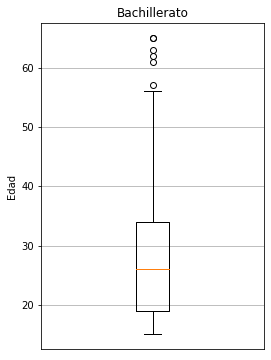

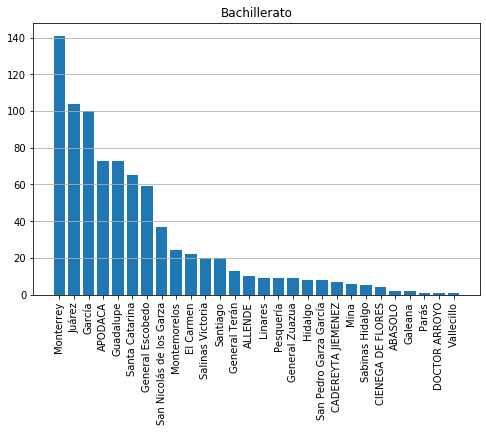

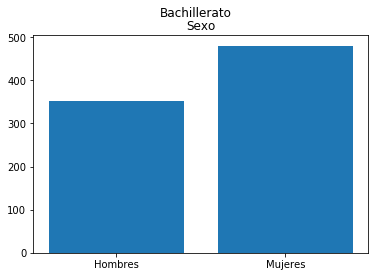

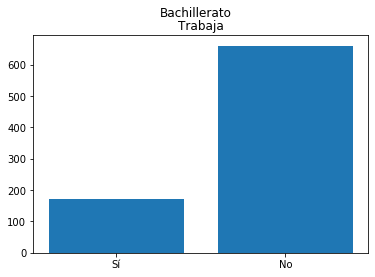

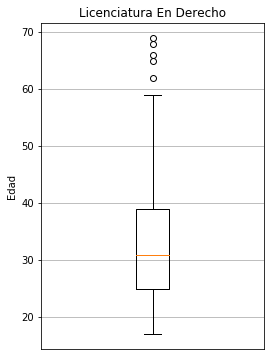

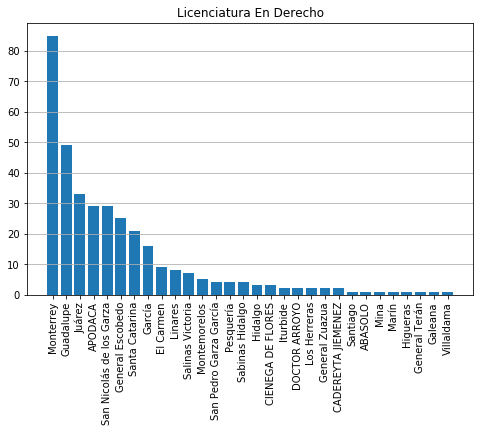

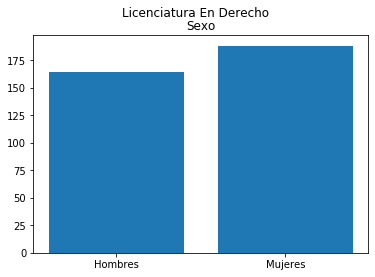

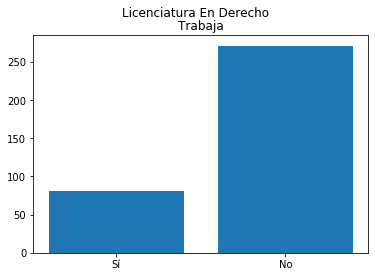

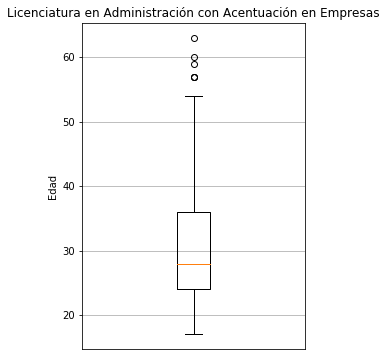

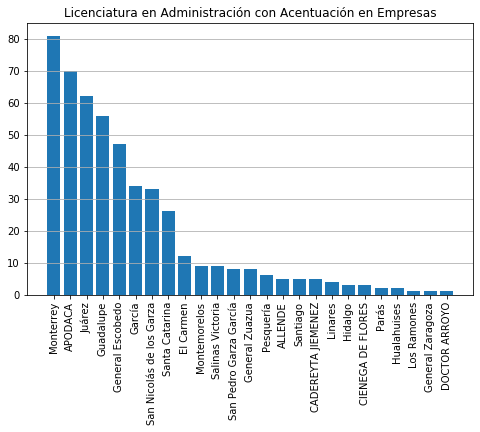

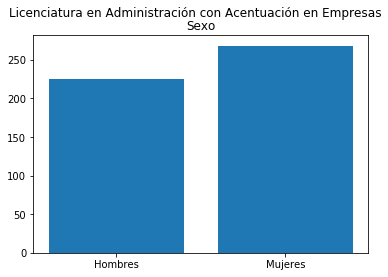

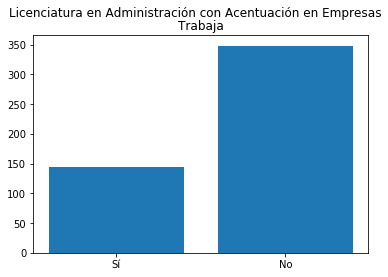

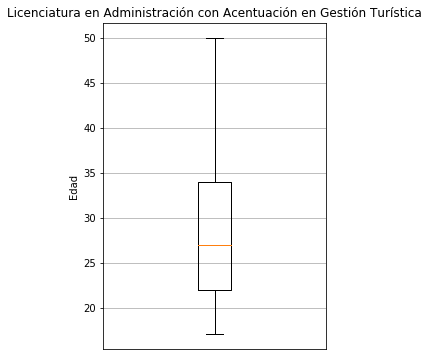

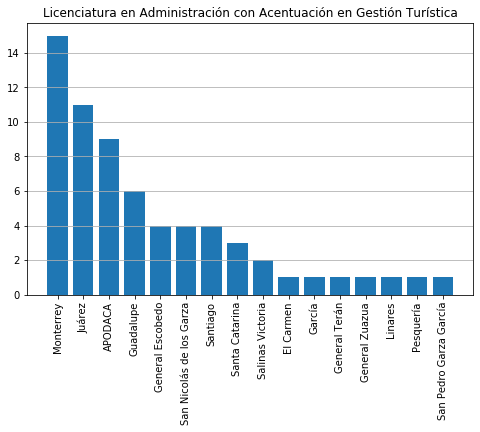

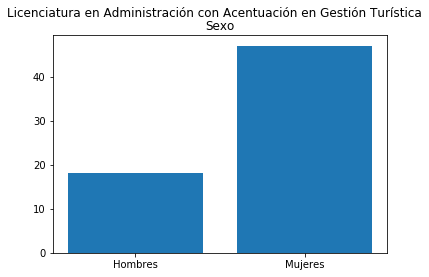

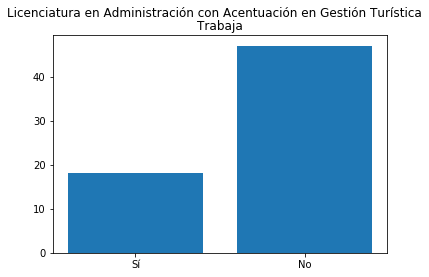

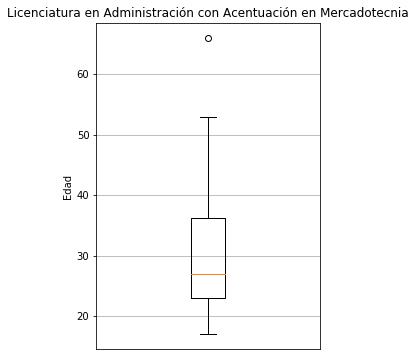

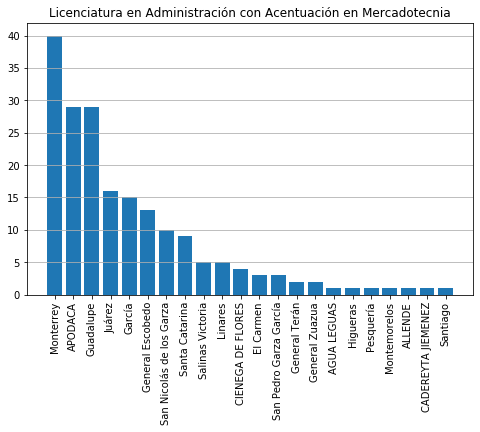

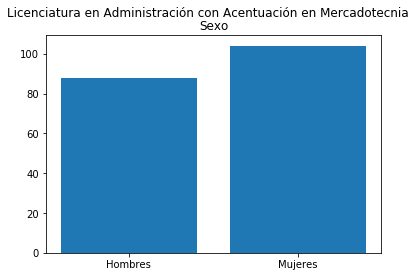

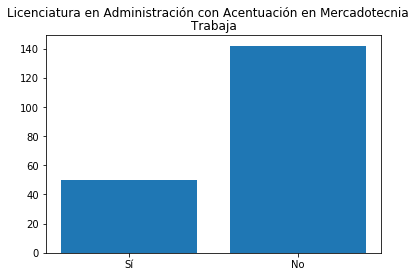

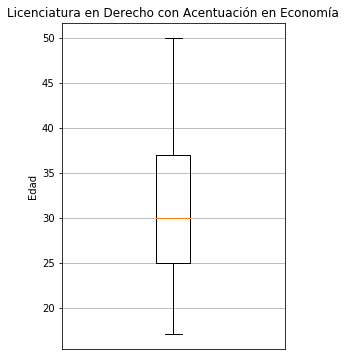

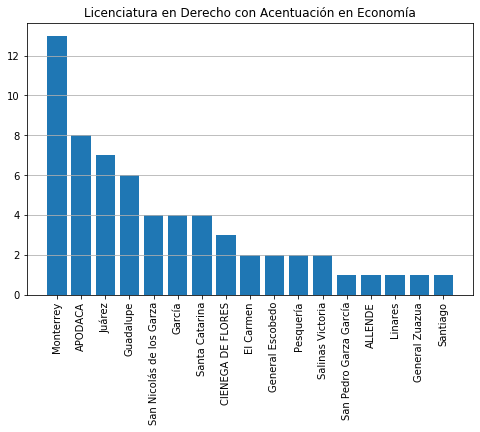

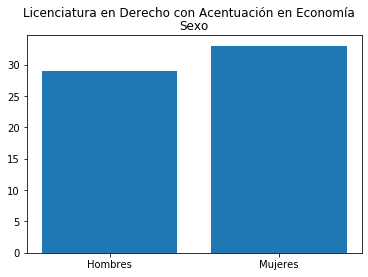

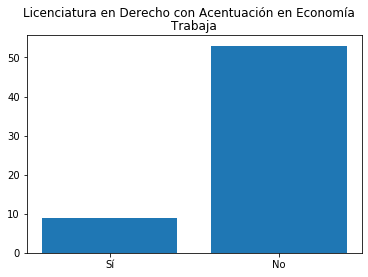

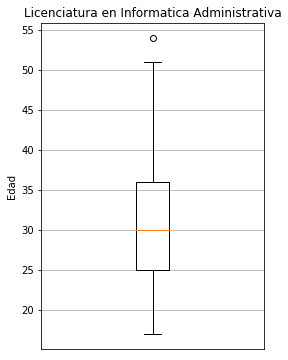

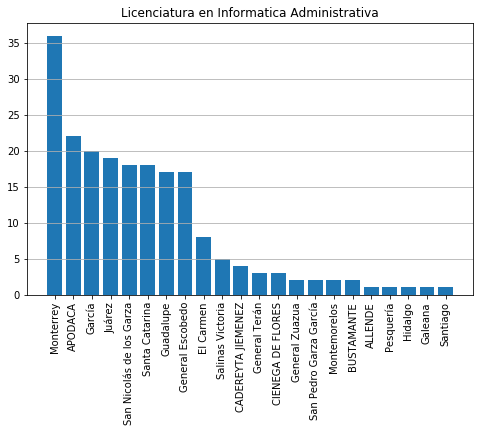

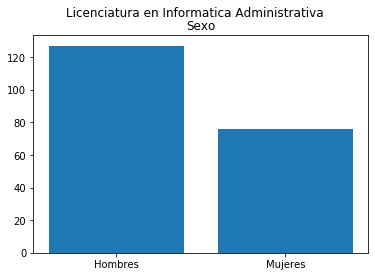

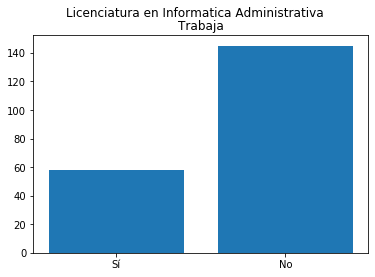

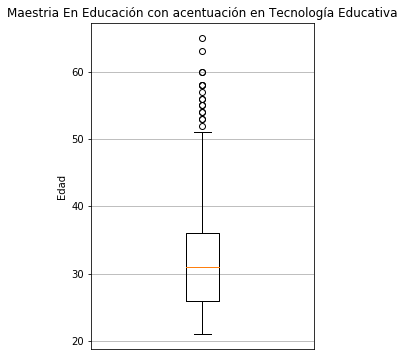

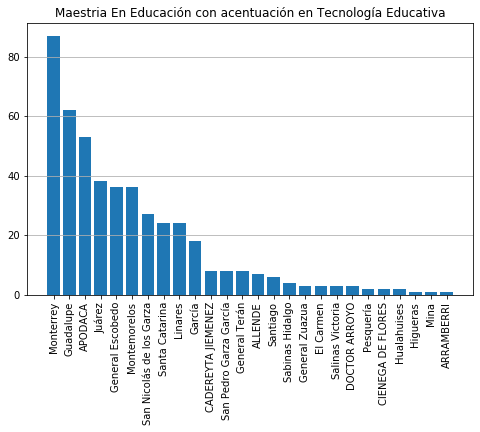

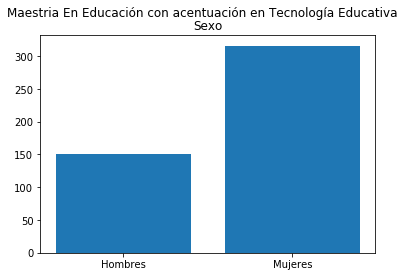

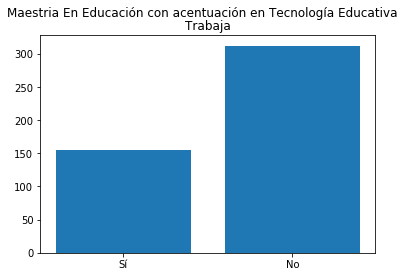

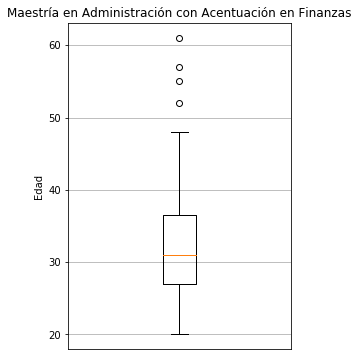

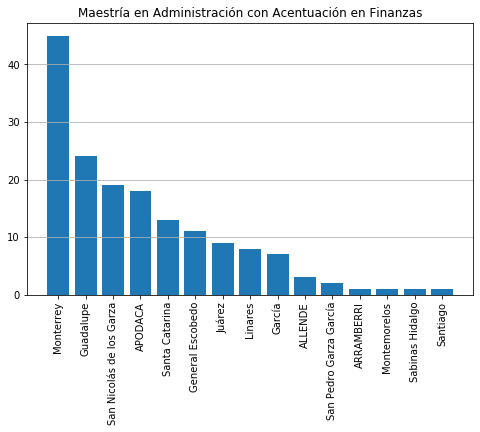

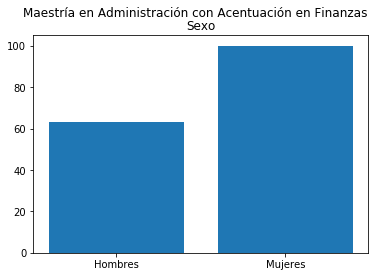

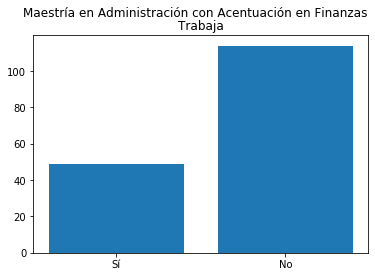

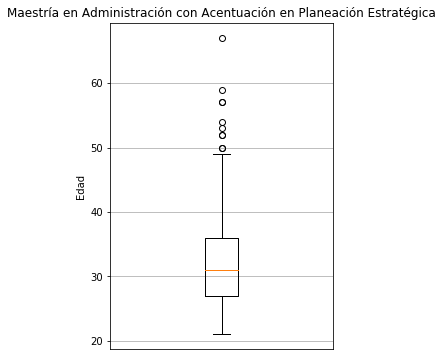

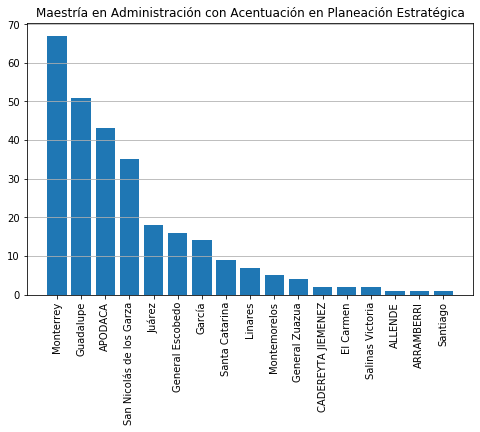

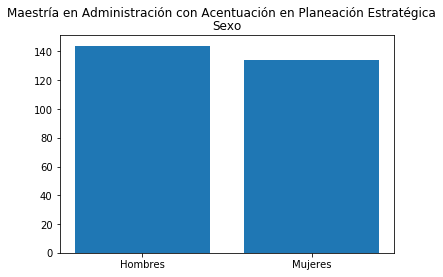

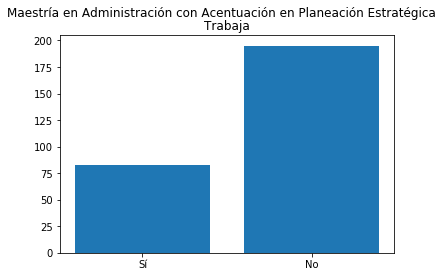

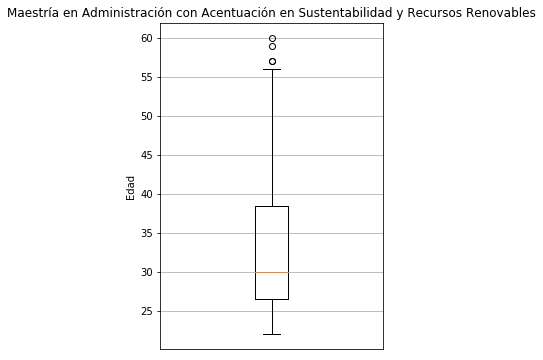

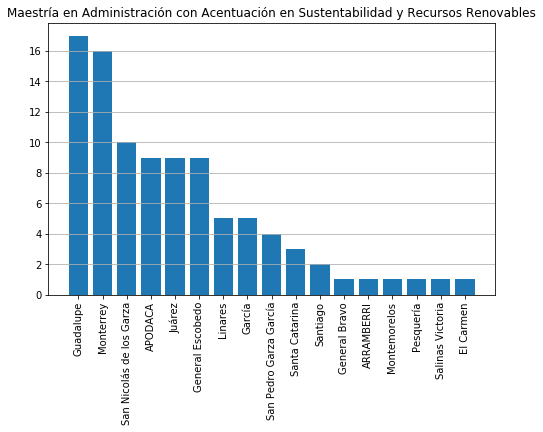

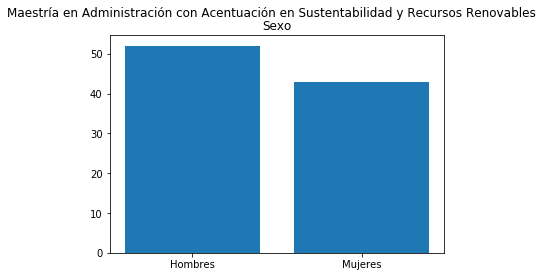

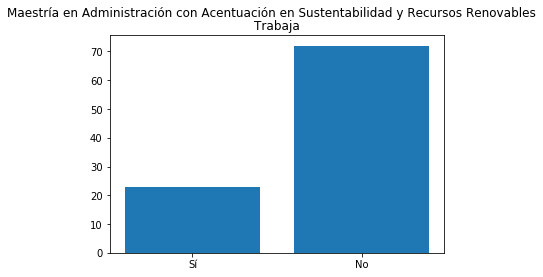

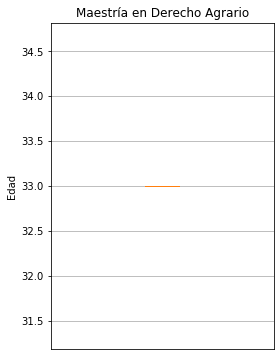

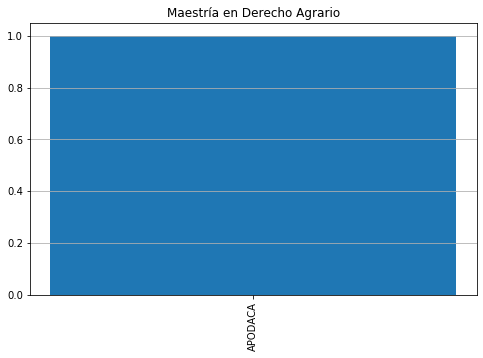

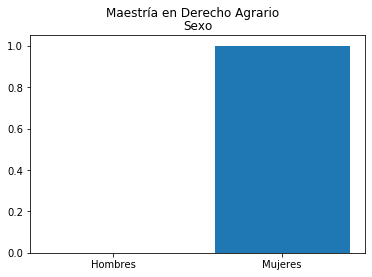

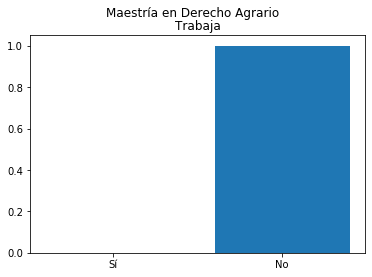

In [42]:
df_programa = df_copia.groupby('ProgramaEducativo')

for n, g in df_programa:
    plt.figure(figsize=(4, 6))
    plt.boxplot(g.Edad)
    plt.ylabel("Edad")
    plt.xticks([], [])
    plt.title(n)
    plt.grid(True)
    plt.show()
    
    municipios = g.groupby('Municipio')
    m = []
    c = []
    for n1, g1 in municipios:
        m.append(n1)
        c.append(len(g1))

    t = pd.DataFrame({'cantidad': c, 'nombre': m})
    t = t.sort_values('cantidad', ascending=False)

    
    plt.figure(figsize=(8, 5))
    plt.bar(x=t.nombre, height=t.cantidad)
    plt.xticks(rotation=90)
    plt.title(n)
    plt.grid(axis='y')
    plt.show()
    
    sexo = [len(g[g.Sexo == "H"]), len(g[g.Sexo == "M"])]
    plt.bar(x=['Hombres', 'Mujeres'], height=sexo)
    plt.suptitle(n)
    plt.title('Sexo')
    plt.show()
    
    trabaja = [len(g[g.Trabaja == "SI"]), len(g[g.Trabaja == "NO"])]
    plt.bar(x=['Sí', 'No'], height=trabaja)
    plt.suptitle(n)
    plt.title('Trabaja')
    plt.show()